# Importando bibliotecas necessárias

In [ ]:
!pip install chess
import chess
import random
import chess.polyglot
from google.colab import drive

drive.mount("/content/drive")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148 kB 11.9 MB/s 
Mounted at /content/drive


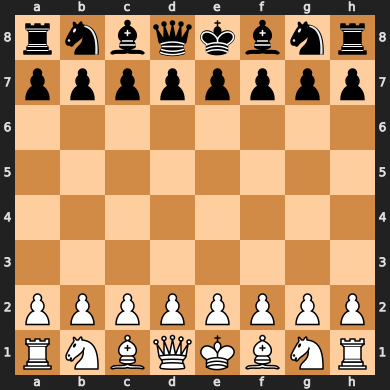

In [ ]:
#criando tabuleiro
board = chess.Board()
board

In [ ]:
def obterMelhorJogada(board=board):
  jogadas = melhoresJogadas(board)
  melhorJogada = None
  if len(jogadas)>0:
    melhorJogada = jogadas[0].move
  if not melhorJogada:
    print("Não achou jogada")
    melhorJogada = random.sample(list(board.legal_moves), 1)[0]
  return melhorJogada


def melhoresJogadas(board=board):
  jogadas = []
  with chess.polyglot.open_reader("drive/MyDrive/Datasets/bookfish.bin") as reader:
    for entry in reader.find_all(board):
      jogadas.append(entry)
  return jogadas


print("Melhor jogada agora: ", obterMelhorJogada())

Melhor jogada agora:  d2d4


In [ ]:
def evaluation(board):
    i = 0
    evaluation = 0
    x = True
    try:
        x = bool(board.piece_at(i).color)
    except AttributeError as e:
        x = x
    while i < 63:
        i += 1
        evaluation = evaluation + (getPieceValue(str(board.piece_at(i))) if x else -getPieceValue(str(board.piece_at(i))))
    return evaluation


def getPieceValue(piece):
    if(piece == None):
        return 0
    value = 0
    if piece == "P" or piece == "p":
        value = 10
    if piece == "N" or piece == "n":
        value = 30
    if piece == "B" or piece == "b":
        value = 30
    if piece == "R" or piece == "r":
        value = 50
    if piece == "Q" or piece == "q":
        value = 90
    if piece == 'K' or piece == 'k':
        value = 900
    return value

def minimax(profundidade, board, maximizando):
  if(profundidade == 0):
      return -evaluation(board)
  possibleMoves = melhoresJogadas(board)
  #print(f"Quantidade de jogadas (profundidae: {profundidade}):", len(possibleMoves))
  if(maximizando):
      bestMove = -9999
      for x in possibleMoves:
          move = chess.Move.from_uci(str(x.move))
          board.push(move)
          bestMove = max(bestMove,minimax(profundidade - 1, board, not maximizando))
          board.pop()
      return bestMove
  else:
      bestMove = 9999
      for x in possibleMoves:
          move = chess.Move.from_uci(str(x.move))
          board.push(move)
          bestMove = min(bestMove, minimax(profundidade - 1, board, not maximizando))
          board.pop()
      return bestMove

def minimaxRoot(board, depth, isMaximizing):
    possibleMoves = melhoresJogadas(board)
    bestMove = -9999
    secondBest = -9999
    thirdBest = -9999
    bestMoveFinal = None
    print("Quantidade de jogadas Root:", len(possibleMoves))
    for x in possibleMoves:
      move = chess.Move.from_uci(str(x.move))
      board.push(move)
      value = max(bestMove, minimax(depth - 1, board, not isMaximizing))
      board.pop()
      if( value > bestMove):
          print("Best score: " ,str(bestMove))
          print("Best move: ",str(bestMoveFinal))
          print("Second best: ", str(secondBest))
          thirdBest = secondBest
          secondBest = bestMove
          bestMove = value
          bestMoveFinal = move
    return bestMoveFinal
  

In [ ]:
i = -1
print("Vamos jogar com as pretas")
board = chess.Board()
while True:
  i+=1
  if i%2==0:
    print("Brancas jogando")
    jogada = obterMelhorJogada(board)
    print("Jogada das brancas", jogada)
  else:
    print("Pretas jogando")
    jogada = minimaxRoot(board, 3, True)
    print("Jogada das pretas", jogada)
  if not jogada:
    jogadas_possiveis = list(board.legal_moves)
    if len(jogadas_possiveis)>0:
      jogada = jogadas_possiveis[0]
  if not jogada:
    print("Não tem mais jogadas possíveis")
    break
  board.push(jogada)
  print(board)
  continuar='s'
  if continuar=='s':
    continue
  else:
    break

Vamos jogar com as pretas
Bancas jogando
Jogada das brancas d2d4
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
Pretas jogando
Quantidade de jogadas Root: 6
Best score:  -9999
Best move:  None
Second best:  -9999
Jogada das pretas g8f6
r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
Bancas jogando
Jogada das brancas c2c4
r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R
Pretas jogando
Quantidade de jogadas Root: 6
Best score:  -9999
Best move:  None
Second best:  -9999
Best score:  -2530
Best move:  g7g6
Second best:  -9999
Jogada das pretas e7e5
r n b q k b . r
p p p p . p p p
. . . . . n . .
. . . . p . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R
Bancas jogando
Jogada das brancas d4e5
r n b q k b . r
p p p p . p p p
. . . . .